In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

In [2]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
'''Funções que serão utilizadas para testar os diferentes algoritmos'''
def func(l):
    x = l[0]
    y = l[1]
    return np.array(10*(x)**2 + 13*np.sin(3*y)+ 15*np.cos(3*x) + y**2)
es_func = func([X,Y])

def ackley(coor, a=20, b=0.2, c=2 * np.pi):
    x=coor[0]
    y=coor[1]
    f = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(
        c * x) + np.cos(c * y))) + a + np.exp(1)
    return np.array(f)
es_ackley = ackley([X,Y])

def himmelblau(coor):
    x=coor[0]
    y=coor[1]
    f = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    return np.array(f)
es_himmelblau = himmelblau([X,Y])

def levy(coor):
    x=coor[0]
    y=coor[1]
    w = 1 + (x - 1) / 4
    f = np.sin(np.pi * w)**2 + (w - 1)**2 * (1 + np.sin(2 * np.pi * y)**2) + (
        w - 1)**2 * (1 + np.sin(2 * np.pi * x)**2)
    return np.array(f)
es_levy = levy([X,Y])

# Função usada para plotar as funções otimizadas
def plot(pnt_func, pnt_ackley, pnt_levy, pnt_himmelblau):
    figure, axis = plt.subplots(2, 2, figsize=(10,10)) 

    fig1 = axis[0,0].contourf(X, Y, es_func, 10, cmap='magma')
    axis[0,0].set_title('func')
    axis[0,0].plot(pnt_func[0], pnt_func[1], "o", color='white')
    figure.colorbar(fig1, ax=axis[0,0])

    fig2 = axis[1,0].contourf(X, Y, es_ackley, 10, cmap='magma')
    axis[1,0].set_title('ackley')
    axis[1,0].plot(pnt_ackley[0], pnt_ackley[1], "o", color='white')
    figure.colorbar(fig2, ax=axis[1,0])

    fig3 = axis[0,1].contourf(X, Y, es_levy, 10, cmap='magma')
    axis[0,1].set_title('levy')
    axis[0,1].plot(pnt_levy[0], pnt_levy[1], "o", color='white')
    figure.colorbar(fig3, ax=axis[0,1])

    fig4 = axis[1,1].contourf(X, Y, es_himmelblau, 10, cmap='magma')
    axis[1,1].set_title('himmelblau')
    axis[1,1].plot(pnt_himmelblau[0], pnt_himmelblau[1], "o", color='white')
    figure.colorbar(fig4, ax=axis[1,1])

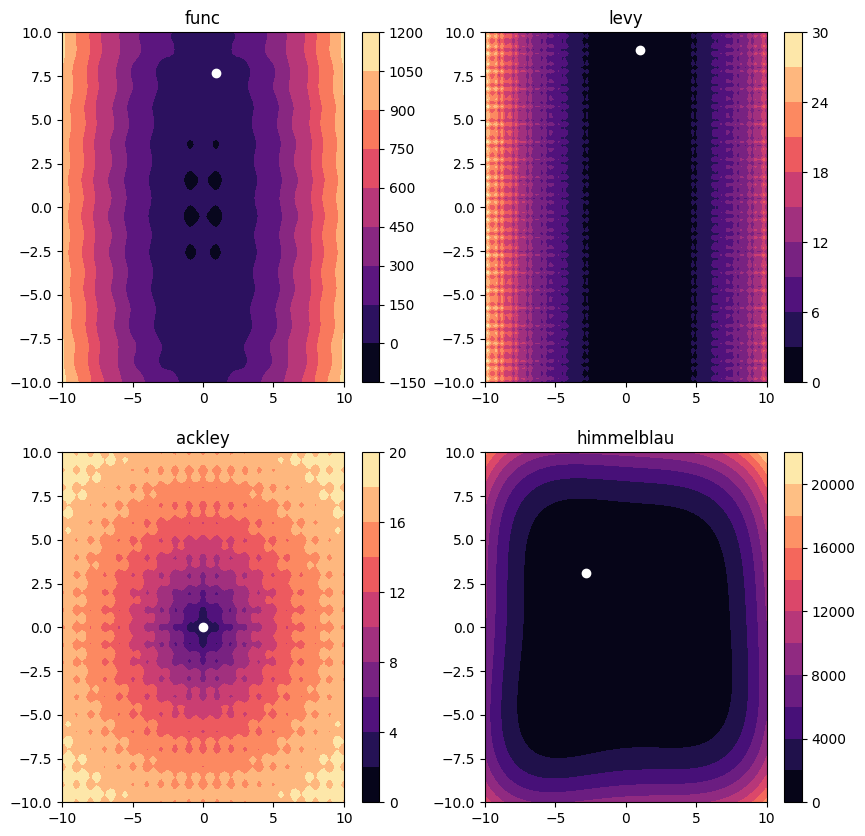

In [3]:
def ciclic_search(f, x, step):
    basis = np.identity(len(x))
    norm = np.inf
    while norm > 0.1:
        x_pass = x.copy()
        for i in range(len(x)):
            k=0
            while True:
                x_k = x + basis[i]*step
                if f(x_k) >= f(x):
                    break
                x=x_k
                k+=1
            while True and k==0:
                x_k = x - basis[i]*step
                if f(x_k) >= f(x):
                    break
                x=x_k      
        norm = np.linalg.norm(x-x_pass)      
    return x

ackley_pnt=ciclic_search(ackley, [9,9], 1)
levy_pnt=ciclic_search(levy, [9,9], 1)
func_pnt=ciclic_search(func, [9,9], 0.1)
himm_pnt=ciclic_search(himmelblau, [9,9], 0.01)
plot(func_pnt, ackley_pnt, levy_pnt, himm_pnt)